<a href="https://colab.research.google.com/github/virf96/Chat-Bot/blob/master/DatosFaltantes_AnalisisCasosCompleto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sustitución de valores faltantes**

Aquellas técnicas que permiten transformar las variables que no presentan valores en alguna de sus observaciones.

Los métodos de sustitución consisten en estimar el valor faltante con base en los que si están presentes.

## Tratamiento de casos completos 


Tratamiento de casos completos (CCA por sus siglas en inglés - Complete-case analysis), también conocido como "eliminación por lista", consiste en solamente incluir en el análisis los casos que presentan valores en **todas** las variables. En otras palabras, se descartan las observaciones, donde falta alguno de los datos para alguna de las variables.

### Cuáles variables se pueden imputar con CCA?

CCA puede ser aplicado ya sea a variables categóricas o numéricas


### Condiciones

Este método **solo** debe utilizarse cuando los datos faltan al azar (MCAR), porque en otro caso introduce sesgo. Cuando los datos faltan al azar, eliminar observaciones con información faltante es lo mismo que aleatoriamente excluir algunas observaciones de los datos. Por lo tanto, solo bajo estas condiciones, después de usar CCA, la muestra es una representación justa de los datos originales.


### Ventajas

- Fácil de implementar 
- No se requiere manipulación de los datos
- Mantiene la distribución de las variables 

### Desventajas

- El set de datos puede reducirse dramáticamente si hay muchos datos faltantes afectando la representatividad de la muestra.
- Las observaciones excluidas pueden contener información importante para el análisis (si los datos no faltan al azar)
- Cuando usamos los modelos en producción, el modelo no sabrá cómo manejar los datos faltantes

### Entonces, cuando usar CCA?

- Cuando los datos faltan de forma completamente aleatoria
- Cuando solo el 5% de los datos contienen observaciones incompletas (con datos faltantes)

En la práctica, CCA puede ser un método aceptable si la cantidad de datos faltantes es baja.
Desafortunadamente, no hay una regla clara para determinar cuán baja es baja. Sin embargo, en general, no más del 5% de las observaciones deberían presentar datos faltantes en la muestra original.

En la práctica, en la mayoría de los caos, la cantidad de observaciones con datos faltantes es alta, y por lo tanto CCA no es una opción.

### CCA y los modelos en producción


Cuando se usa CCA, se eliminan las observaciones que tienen datos faltantes durante el entrenamiento del modelo. Sin embargo, los datos reales usados para evaluar el modelo, pueden tener datos faltantes. Esto causa problemas en los sistemas «online», ya que el modelo no sabrá cómo manejar estos casos (ya que no se ha introducido ninguna técnica para manejar datos faltantes, solo se los ha removido).

Para evitar este problema, cuando se pone un modelo en producción necesitamos hacer 1 de 2 cosas: 
1)	no se hace scoring con datos faltantes
2)	reemplazamos los valores faltantes con otro número. 

Podemos escoger cualquiera de las técnicas de imputación que discutiremos en las siguientes clases para reemplazar estos datos faltantes en producción.

## En este demo:

Usaremos los datos de House Prices para demostrar cómo usar Tratamiento de casos completos - CCA.


- Para bajar los datos por favor referirse a la clase sobre **Datos** en la **Sección 1** del curso.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Mostrar todas las columnas presentes en los datos
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Carguemos los datos y exploremos su tamaño

data = pd.read_csv('/content/drive/My Drive/datasets/houseprice.csv')
data.shape

(1460, 81)

In [4]:
# visualicemos los valores de los datos
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# variables con valores faltantes
vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
vars_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
#Porcentaje de valores faltantes en una variable
data['LotFrontage'].isnull().mean()

0.1773972602739726

In [6]:
# Miremos si las variables son categóricas o numéricas 
data[vars_with_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

Hay variables numéricas y categóricas con valores faltantes (podemos ver que hay variables de tipo float y object).

In [13]:
# Variables con valores faltantes o NA

data[vars_with_na].head(10)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
5,85.0,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1993.0,Unf,TA,TA,NaN,MnPrv,Shed
6,75.0,NaN,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
7,NaN,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,1973.0,RFn,TA,TA,NaN,NaN,Shed
8,51.0,NaN,None,0.0,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.0,Unf,Fa,TA,NaN,NaN,NaN
9,50.0,NaN,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.0,RFn,Gd,TA,NaN,NaN,NaN


In [14]:
# Porcentaje de observaciones con valores faltantes

# Calculemos el porcentaje de valores faltantes (como en la sección 3)
# usando los métodos isnull() y mean() de pandas
data_na = data[vars_with_na].isnull().mean()

# transformar array en dataframe
data_na = pd.DataFrame(data_na.reset_index())

# anadir columnas en el dataframe
data_na.columns = ['variable', 'na_percentage']

# ordenar el dataframe de acuerdo al porcetage de na por variable
data_na.sort_values(by='na_percentage', ascending=False, inplace=True)

# mostrar
data_na

,variable,na_percentage
16,PoolQC,0.995205
18,MiscFeature,0.963014
1,Alley,0.937671
17,Fence,0.807534
10,FireplaceQu,0.472603
0,LotFrontage,0.177397
11,GarageType,0.055479
12,GarageYrBlt,0.055479
13,GarageFinish,0.055479
14,GarageQual,0.055479


Las primeras 6 variables tienen un gran porcentaje de información faltante. Por lo tanto, no es recomendable usar CCA para estas variables, ya que descartaríamos la mayoría de los datos. Sin embargo, podemos usar CCA si omitimos estas variables y consideramos solo las restantes en el set de datos.

Para este demo, ignoraremos las primeras 6 variables, y procederemos con CCA para las variables restantes.


In [15]:
# capturemos las variables con menos de 5% de valores faltantes NA

vars_cca = [var for var in data.columns if data[var].isnull().mean() < 0.05]
vars_cca

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [16]:
# el método dropna(), descarta las observaciones que contienen 
# na en cualquiera de las filas / columnas

len(data[vars_cca].dropna()) / len(data)

0.9671232876712329

In [18]:
# Descartemos observaciones con na en cualquiera de las variables

data_cca = data[vars_cca].dropna()
data.shape, data_cca.shape

((1460, 81), (1412, 70))

Hemos removido alrededor de 48 observaciones del set de datos original.

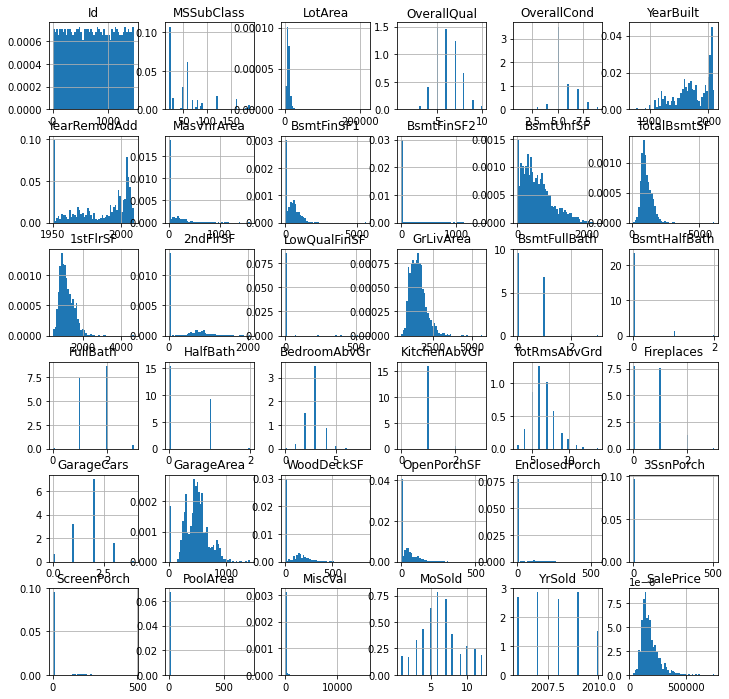

In [19]:
# grafiquemos histogramas para todas las variables numéricas
# para el dataframe data_cca  (como en la sección 3)

data_cca.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

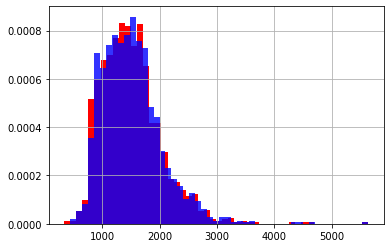

In [20]:
## Miremos la distribución de unas variables antes y después de cca
## histograma

fig = plt.figure()
ax = fig.add_subplot(111)

# datos originales
data['GrLivArea'].hist(bins=50, ax=ax, density=True, color='red')

# datos después de cca, el argumento alpha hace el color 'transparente'
# así podemos sobreponer las dos distribuciones
data_cca['GrLivArea'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

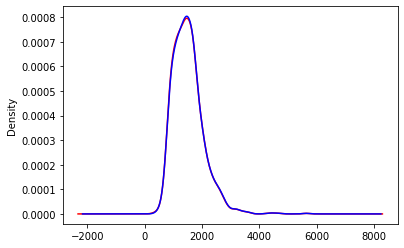

In [21]:
## miremos la distribución de unas variables antes y depués de cca
# density plot

fig = plt.figure()
ax = fig.add_subplot(111)

# datos originales
data['GrLivArea'].plot.density(color='red')

# datos después de cca
data_cca['GrLivArea'].plot.density(color='blue')

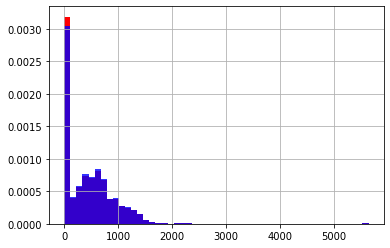

In [22]:
## Miremos la distribución de unas variables antes y después de cca
## histograma

fig = plt.figure()
ax = fig.add_subplot(111)

# datos originales
data['BsmtFinSF1'].hist(bins=50, ax=ax, density=True, color='red')

# datos después de cca, el argumento alpha hace el color 'transparente'
# así podemos sobreponer las dos distribuciones

data_cca['BsmtFinSF1'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

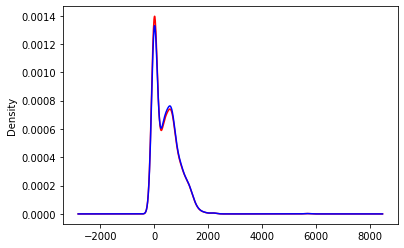

In [23]:
## miremos distribución de unas variables antes y depués de cca
# density plot

fig = plt.figure()
ax = fig.add_subplot(111)

# set de datos original
data['BsmtFinSF1'].plot.density(color='red')

# data depués cca
data_cca['BsmtFinSF1'].plot.density(color='blue')

Podemos ver de las gráficas anteriores, que la distribución de las variables numéricas seleccionadas en los datos originales y después de cca, son muy similares, que es lo que esperamos con CCA si los datos faltan al azar y solo en una pequeña proporción de las observaciones.

En las siguientes celdas, vamos a explorar la distribución de las variables categóricas.  Evaluaremos el porcentaje de observaciones por cada categoría, como hicimos en las secciones 2 y 3 del curso.


In [24]:
# la siguiente función captura el porcentaje de observaciones
# por cada categoría en los datos originales y los datos después de cca
# y los pone en un nuevo dataframe


def categorical_distribution(df, df_cca, variable):
    tmp = pd.concat(
        [
            # percentaje de observaciones por categoría, datos originales
            df[variable].value_counts() / len(df),

            # percentaje de observaciones por categoría, datos después de cca
            df_cca[variable].value_counts() / len(df_cca)
        ],
        axis=1)

    # re-nombrar columnas
    tmp.columns = ['original', 'cca']

    return tmp

In [25]:
# correr la función para una de las variables categóricas
categorical_distribution(data, data_cca, 'BsmtQual')

,original,cca
TA,0.444521,0.458924
Gd,0.423288,0.431303
Ex,0.082877,0.084986
Fa,0.023973,0.024788


In [26]:
categorical_distribution(data, data_cca, 'MasVnrType')

,original,cca
None,0.591781,0.588527
BrkFace,0.304795,0.310198
Stone,0.087671,0.090652
BrkCmn,0.010274,0.010623


In [27]:

categorical_distribution(data, data_cca, 'SaleCondition')

,original,cca
Normal,0.820548,0.820822
Partial,0.085616,0.086402
Abnorml,0.069178,0.070822
Family,0.013699,0.014164
Alloca,0.008219,0.005666
AdjLand,0.002740,0.002125


Podemos ver que la distribución en cada una de las categorías es muy similar en los datos originales y después de cca. Una vez más, es lo que esperamos con CCA si los datos faltan al azar y solo en una pequeña proporción de las observaciones.
